# Lập trình thống kê cơ bản

## Ước tính cỡ mẫu cho thí nghiệm can thiệp 2 phân nhóm/2 thời điểm


### BS. Lê Ngọc Khả Nhi

# Giới thiệu

Trong nghiên cứu y học lâm sàng, một vấn đề thường gặp là khảo sát hiệu ứng của một can thiệp điều trị. Bài toán này thường được giải quyết thông qua một thí nghiệm đơn giản, trong đó ta chia ngẫu nhiên n bệnh nhân thành 2 phân nhóm A, B. Phân nhóm A không có can thiệp, hoặc sử dụng Placebo, phân nhóm B nhận can thiệp (phẫu thuật, phác đồ điều trị). Hiệu quả điều trị được khảo sát thông qua một đại lượng lâm sàng Y là biến số liên tục. Y được khảo sát tại 2 thời điểm/điều kiện - t0 = ban đầu (trước khi can thiệp, baseline) và t1 = sau khi can thiệp. Hiệu ứng can thiệp trung bình được ước tính bằng khác biệt giữa 2 mức độ thay đổi Y giữa t1-t0 của mỗi phân nhóm.

Bài thực hành hôm nay Nhi sẽ hướng dẫn các bạn lập trình thủ công bằng ngôn ngữ Python để mô phỏng ước tính cỡ mẫu cho thí nghiệm trên.

# Phân tích bài toán

## Giả thuyết và tham số trong bài toán

Trong bài toán này, có những tham số như sau:

Mục tiêu của kiểm định thống kê là hiệu ứng điều trị, $\delta$ (delta)

$H_0:\delta =0$

$H_1:\delta\neq0$

Hiệu ứng delta được định nghĩa như giá trị tuyệt đối khác biệt giữa 2 thay đổi trung bình $\mu_{2}$ và $\mu_{1}$

$$\delta = \left | \mu_{2} - \mu_{1}\right |$$

Thí dụ phân nhóm B có 5 bệnh nhân, 

ở thời điểm t0 (trước can thiệp), giá trị YB0 = 
[5.56162422, 3.93309074, 3.31832627, 6.40175127, 3.35071644]

ở thời điểm t1 (sau can thiệp), giá trị YB1 = 
[7.54076255, 4.0976205 , 6.31251746, 7.86178527, 6.01684101]

Ta sẽ có trung bình thay đổi muB = 1.85280357

Giả sử ở phân nhóm A, giá trị trung bình muA  chỉ có 0.5, ta có delta = 1.35 đơn vị

Tuy nhiên, ngoài 2 tham số mu1, mu2, ta còn có 3 tham số khác, đó là sigma1 và sigma2 tương ứng với độ lệch chuẩn của thay đổi ở mỗi phân nhóm; và rho, là hệ số tương quan giữa 2 thời điểm ban đầu (baseline) và sau trong phân nhóm được can thiệp (nhóm B).

## Công thức tính cỡ mẫu

Cỡ mẫu n cho mỗi phân nhóm được ước tính bằng công thức sau (Rosner B. 2006)

$$n=\frac{2 \times \sigma_{d}^2 (Z_{1-\alpha/2} + Z_{1 - \beta})^2}{\delta^2}$$

Với: $\sigma_{d}$ là độ lệch chuẩn của hiệu ứng can thiệp $\delta$ 

$$\sigma_{d} = \sigma_{1}^{2} + \sigma_{2}^{2} - 2.\rho .\sigma_{1}.\sigma_{2}$$

Trong đó:

$\mu_{1}$ và $\mu_{2}$ là trung bình của thay đổi giữa thời điểm ban đầu (baseline)/trước can thiệp và thời điểm sau can thiệp (post) của 2 phân nhóm 1 và 2.

$\sigma_{1}$ và $\sigma_{2}$ là độ lệch chuẩn của sự thay đổi giữa thời điểm ban đầu (baseline)/trước can thiệp và thời điểm sau can thiệp (post) của 2 phân nhóm 1 và 2.

$\delta$ là giá trị tuyệt đối của hiệu số giữa $\mu_{1}$ và $\mu_{2}$, hay nói cách khác, là hiệu ứng của can thiệp mà ta cần khảo sát.

$\rho$ là hệ số tương quan giữa 2 thời điểm ban đầu (baseline) và sau của riêng phân nhóm được can thiệp; có thể dao động từ 0 đến 1

$\alpha$ là Type I error; giá trị mặc định là 0.05

$\beta$ là Type II error, từ đó 1−β là power; giá trị mặc định = 0.2

$Z_p$ là bách phân vị thứ p của phân phối chuẩn hóa (standard normal)

# Lập trình hàm tính cỡ mẫu

Nhi viết hàm để áp dụng công thức trên, nhằm ước tính tổng cỡ mẫu cho 2 phân nhóm A,B từ các tham số.

In [1]:
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

In [2]:
def sample_size_paired(mu1: float,
                       mu2: float,
                       sigma1: float,
                       sigma2: float,
                       rho = 0.5, 
                       alpha = 0.05,
                       beta = 0.2):
    
    delta = abs(mu2 - mu1)
    
    sigmad2 = sigma1**2 + sigma2**2 - 2*rho*sigma1*sigma2
    
    za = norm.ppf(1 - alpha*0.5)
    zb = norm.ppf(1 - beta)
        
    n = 2*sigmad2*(za+zb)**2/(delta**2)
    
    return 2*n

## Ước tính cỡ mẫu cho 1 giả định duy nhất

Giả sử từ thông tin y văn cho một thí nghiệm khảo sát hiệu quả điều trị của loại thuốc X trên biomarker Y, ta biết trung bình thay đổi ở nhóm Placebo = 4, độ lệch chuẩn = 3.5; trung bình thay đổi ở nhóm điều trị = 7.5, độ lệch chuẩn = 5; hệ số tương quan rho giả định = 0.5 (nếu không có thông tin), ta dça_(t alpha = 0.05, beta = 0.2 với kì vọng power = 0.8. Kết quả cho ra là n = 50.6; như vậy cần khoảng 25 bệnh nhân cho mỗi phân nhóm.

In [3]:
sample_size_paired(mu1 = 4,
                mu2 = 7.5,
                sigma1 = 3.5,
                sigma2 = 5,
                rho = 0.5,
                alpha = 0.05,
                beta = 0.2)

50.6172652255982

## Mô phỏng cho nhiều giả định

Trên thực tế, không bao giờ ta chỉ ước tính 1 cỡ mẫu cho 1 giả định duy nhất, nhưng cần phải mô phỏng cho hàng loạt giả định, dao động xung quanh 1 giả định trung tâm mà ta kì vọng/tin tưởng; sau đó ta phải đối chiếu và cân bằng giữa kết quả mô phỏng và tính khả thi của dự án, như kinh phí, nhân lực, thời gian... để chọn một giá trị cỡ mẫu tối ưu.

Để thực hiện mô phỏng trực quan, Nhi viết 1 hàm cho phép biểu diễn khuynh hướng thay đổi của giá trị cỡ mẫu tùy theo 6 tham số trong bài toán, bao gồm mu1, mu2, sigma1, sigma2, hiệu ứng delta, rho.

In [5]:
def plot_ss_paired(mu1: float,
                   mu2: float,
                   sigma1: float,
                   sigma2: float,
                   rho = 0.5,
                   alpha = 0.05, 
                   beta = 0.2,
                   y_name = 'Biomarker Y', 
                   g=['Baseline','Post']):
    
    n_est = sample_size_paired(mu1, mu2, sigma1, sigma2, rho, alpha, beta)
    
    delta = abs(mu2 - mu1)
    sigma_d = (sigma1**2 + sigma2**2 - 2*rho*sigma1*sigma2)**0.5
    
    m1 = np.linspace(0.8*mu1, mu1*1.2, num=50)
    m2 = np.linspace(0.8*mu2, mu2*1.2, num=50)
    ds = np.abs(m2 - m1)
    s1 = np.linspace(sigma1 - (sigma1/2), sigma1 + (0.7*sigma1), num=50)
    s2 = np.linspace(sigma2 - (sigma2/2), sigma2 + (0.7*sigma2), num=50)
    rs =  np.linspace(0.1,1,num=50)
    
    fig, axs = plt.subplots(2,3, figsize=(10,6))
    
    fig.suptitle(f"Hiệu quả can thiệp giữa 2 thời điểm {g[1]} và {g[0]}")
    
    axs[0,0].set_ylabel('Cỡ mẫu ước tính')
    axs[0,0].set_xlabel("Trung bình thay đổi nhóm chứng")
    
    axs[0,1].set_ylabel('Cỡ mẫu ước tính')
    axs[0,1].set_xlabel("Trung bình thay đổi nhóm can thiệp")
    
    axs[0,2].set_ylabel('Cỡ mẫu ước tính')
    axs[0,2].set_xlabel("Hiệu ứng delta")
    
    axs[1,0].set_ylabel('Cỡ mẫu ước tính')
    axs[1,0].set_xlabel("Độ lệch chuẩn thay đổi nhóm chứng")
    
    axs[1,1].set_ylabel('Cỡ mẫu ước tính')
    axs[1,1].set_xlabel('Độ lệch chuẩn thay đổi nhóm can thiệp')
    
    axs[1,2].set_ylabel('Cỡ mẫu ước tính')
    axs[1,2].set_xlabel("Hệ số tương quan rho nhóm can thiệp")
    
    for b in [0.05,0.1,0.2,0.25,0.3,]:
        
        sample1a = [2*sample_size_paired(mu1 = x, mu2 = mu2, sigma1= sigma1, sigma2= sigma2, alpha = 0.05, beta = b) for x in m1]
        axs[0,0].plot(m1, sample1a, label = f'power: {1-b}')
        axs[0,0].vlines(mu1,0, max(sample1a), colors='k', linestyles='dashed', lw=0.8)
        axs[0,0].hlines(n_est,min(m1), max(m1), colors='k', linestyles='dashed', lw=0.8)
        
        sample1b = [2*sample_size_paired(mu1 = mu1, mu2 = x, sigma1= sigma1, sigma2= sigma2, alpha = 0.05, beta = b) for x in m2]
        axs[0,1].plot(m2, sample1b, label = f'power: {1-b}')
        axs[0,1].vlines(mu2,0, max(sample1b), colors='k', linestyles='dashed', lw=0.8)
        axs[0,1].hlines(n_est,min(m2), max(m2), colors='k', linestyles='dashed', lw=0.8)
        
        sample1c = [2*sample_size_paired(mu1 = mu1/2, mu2 = mu1/2 + x, sigma1= sigma1, sigma2= sigma2, alpha = 0.05, beta = b) for x in ds]
        axs[0,2].plot(ds, sample1c, label = f'power: {1-b}')
        axs[0,2].vlines(delta,0, max(sample1c), colors='k', linestyles='dashed', lw=0.8)
        axs[0,2].hlines(n_est,min(ds), max(ds), colors='k', linestyles='dashed', lw=0.8)
        
        sample2 = [2*sample_size_paired(mu1 = mu1, mu2 = mu2, sigma1= x, sigma2= sigma2, alpha = 0.05, beta = b) for x in s1]
        axs[1,0].plot(s1, sample2, label = f'power: {1-b}')
        axs[1,0].vlines(sigma1,0, max(sample2), colors='k', linestyles='dashed', lw=0.8)
        axs[1,0].hlines(n_est,min(s1), max(s1), colors='k', linestyles='dashed', lw=0.8)
        
        sample3 = [2*sample_size_paired(mu1 = mu1, mu2 = mu2, sigma1= sigma1, sigma2 = x, alpha = 0.05, beta = b) for x in s2]
        axs[1,1].plot(s2, sample3, label = f'power: {1-b}')
        axs[1,1].vlines(sigma2,0, max(sample3), colors='k', linestyles='dashed', lw=0.8)
        axs[1,1].hlines(n_est,min(s2), max(s2), colors='k', linestyles='dashed', lw=0.8)
        
        sample4 = [2*sample_size_paired(mu1 = mu1, mu2 = mu2, sigma1= sigma1, sigma2 = sigma2, rho = x, alpha = 0.05, beta = b) for x in rs]
        axs[1,2].plot(rs, sample4, label = f'power: {1-b}')
        axs[1,2].vlines(rho,0, max(sample4), colors='k', linestyles='dashed', lw=0.8)
        axs[1,2].hlines(n_est,min(rs), max(rs), colors='k', linestyles='dashed', lw=0.8)
        
        axs[1,2].legend()
        
    plt.tight_layout()
    plt.show()

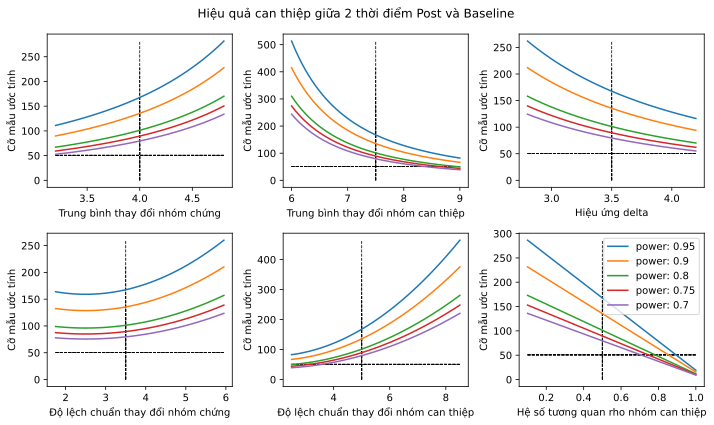

In [6]:
plot_ss_paired(mu1 = 4,
                mu2 = 7.5,
                sigma1 = 3.5,
                sigma2 = 5,
                rho = 0.5,
                alpha = 0.05,
                beta = 0.2,
                y_name = 'Biomarker Y', 
                g=['Baseline','Post'])

Dựa vào kết quả mô phỏng cho thí dụ trên, ta có thể nhận xét:
    
Hiệu ứng điều trị càng nhỏ bé, khó phát hiện, càng cần nhiều bệnh nhân.

Độ lệch chuẩn (sự phân tán của thay đổi theo thời gian) càng cao, cỡ mẫu càng tăng; 

Khuynh hướng thay đổi càng đồng nhất trong phân nhóm can thiệp (toàn bộ bệnh nhân đều đáp ứng điều trị), thì rho càng gần 1, và cỡ mẫu cần thiết càng giảm; ngược lại độ phân tán ngẫu nhiên càng cao (đáp ứng hỗn loạn tùy theo cá thể) thì rho càng thấp, cỡ mẫu càng tăng. 

Thông thường, mu1/sigma1 và mu2/sigma2 dễ dàng trích xuất từ y văn; nhưng rho thì chỉ có thể giả định và mô phỏng, vì không được trình bày trong y văn, trừ khi ta có dữ liệu gốc hay ước tính rho trực quan từ biểu đồ individual line plot/boxplot của nghiên cứu này.

Bài thực hành đã hết, các bạn lại có thêm trong tay một công cụ để ước tính cỡ mẫu cho thí nghiệm can thiệp đối chứng ngẫu nhiên 2 phân nhóm/2 thời điểm, rất thông dụng trong nghiên cứu y học.

Tài liệu tham khảo:
    
1) Rosner, B. Fundamentals of Biostatistics. Sixth edition. Thomson Brooks/Cole. 2006. 

2) Source code từ R package powerMediation của Weiliang Qiu (2015)
https://cran.r-project.org/web/packages/powerMediation/index.html